In [21]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#optins
input_size = 1
output_size = 1
learning_rate = 0.01
training_epoch = 100

In [23]:
#define input_data
x_train = np.array([[3.2], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [29]:
#define module
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [30]:
#generate model
model = Model()

In [31]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [36]:
#start laarning
for epoch in range(training_epoch):
    
    x_data = torch.from_numpy(x_train)
    y_data = torch.from_numpy(y_train)
    
    x_data = Variable(x_data)
    y_data = Variable(y_data)
    
    
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data[0])
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(epoch, loss.data[0])
    

0 0.4075009524822235
1 0.406277060508728
2 0.40505945682525635
3 0.4038480520248413
4 0.4026429057121277
4 0.4026429057121277
5 0.40144386887550354
6 0.4002510905265808
7 0.3990643322467804
8 0.3978837728500366
9 0.39670923352241516
9 0.39670923352241516
10 0.39554062485694885
11 0.3943781554698944
12 0.39322155714035034
13 0.39207085967063904
14 0.39092621207237244
14 0.39092621207237244
15 0.3897871971130371
16 0.3886541724205017
17 0.3875269889831543
18 0.3864055275917053
19 0.3852898180484772
19 0.3852898180484772
20 0.3841799199581146
21 0.3830755650997162
22 0.38197705149650574
23 0.3808840215206146
24 0.37979671359062195
24 0.37979671359062195
25 0.3787148594856262
26 0.3776385486125946
27 0.3765679597854614
28 0.37550270557403564
29 0.3744429349899292
29 0.3744429349899292
30 0.3733886778354645
31 0.37233975529670715
32 0.371296226978302
33 0.37025803327560425
34 0.3692252039909363
34 0.3692252039909363
35 0.3681977093219757
36 0.36717528104782104
37 0.36615827679634094
38 0.36

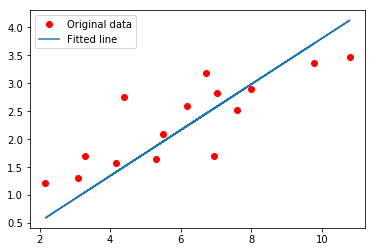

In [46]:
#show and save model
predicted = model(Variable(torch.from_numpy(x_train)))
predicted = predicted.data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')